In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Linear Transformations

In [2]:
### MAIN FUNCTION ###
def transform(ascii_art, matrix):
    # Convert ASCII art to coordinates
    original_coords = _ascii_art_to_coords(ascii_art)

    # Apply linear transformation
    transformed_coords = _apply_linear_transform(original_coords, matrix)

    # Plot the original and transformed ASCII art
    _plot_coords(original_coords, transformed_coords)

In [3]:
### HELPER FUNCTIONS ###
def _ascii_art_to_coords(ascii_art):
    coords = []
    for y, line in enumerate(ascii_art):
        for x, char in enumerate(line):
            if char != ' ':
                coords.append((x, y, char))
    return coords

def _apply_linear_transform(coords, matrix):
    new_coords = []
    for x, y, char in coords:
        vec = np.array([x, y])
        new_pos = matrix @ vec
        new_coords.append((new_pos[0], new_pos[1], char))  # keep as float for plotting
    return new_coords

def _plot_coords(original, transformed):
    ox = [x for x, y, c in original]
    oy = [y for x, y, c in original]
    tx = [x for x, y, c in transformed]
    ty = [y for x, y, c in transformed]

    plt.figure(figsize=(8, 6))
    plt.scatter(ox, [-y for y in oy], c='blue', label='Original', marker='s')
    plt.scatter(tx, [-y for y in ty], c='red', label='Transformed', marker='x')
    plt.legend()
    plt.title("Applying a Linear Transformation to ASCII Art")
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.show()

    

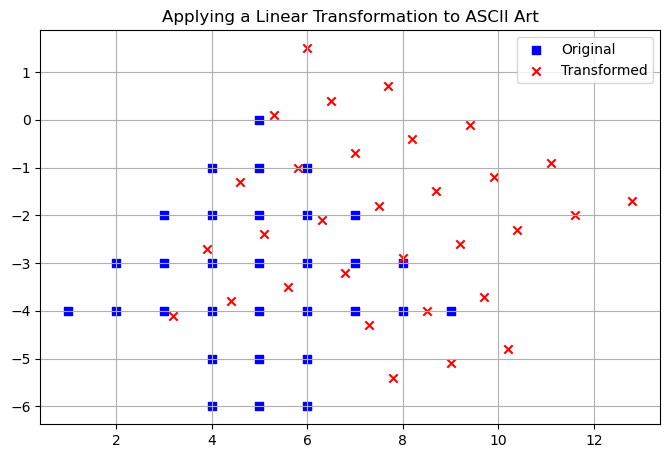

In [44]:
# Example 1
ascii_art = [
    "     *     ",
    "    ***    ",
    "   *****   ",
    "  *******  ",
    " ********* ",
    "    ***    ",
    "    ***    "
]

matrix1 = np.array([
    [ 1.2, 0.5],
    [-0.3, 1.1]
])

transform(ascii_art, matrix1)

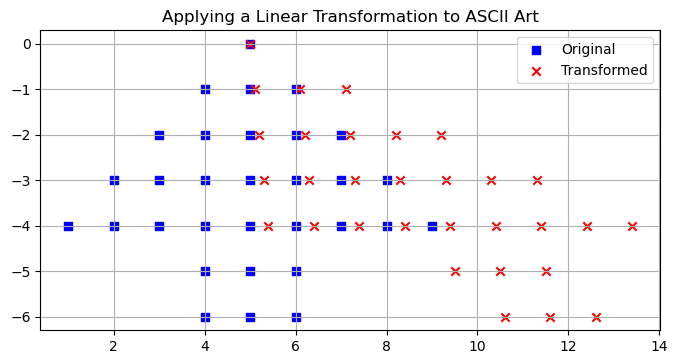

In [21]:
# Example 2
ascii_art = [
    "     *     ",
    "    ***    ",
    "   *****   ",
    "  *******  ",
    " ********* ",
    "    ***    ",
    "    ***    "
]

matrix2 = np.array([
    [1, 1.1],
    [0, 1]
])

transform(ascii_art, matrix2)

### Connecting to Eigenvalues and Eigenvectors

In [32]:
def eigen(matrix):
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Output results
    print("Matrix:")
    print(matrix)

    # Optional: Display eigenvectors alongside their eigenvalues
    print("\nEigenvalue-Eigenvector pairs:")
    for i in range(len(eigenvalues)):
        print(f"λ = {eigenvalues[i]:.4f}, v = any multiple of {np.round(eigenvectors[:, i],4)}")

In [33]:
eigen(matrix2)

Matrix:
[[1.  1.1]
 [0.  1. ]]

Eigenvalue-Eigenvector pairs:
λ = 1.0000, v = any multiple of [1. 0.]
λ = 1.0000, v = any multiple of [-1.  0.]


In [45]:
eigen(matrix1)

Matrix:
[[ 1.2  0.5]
 [-0.3  1.1]]

Eigenvalue-Eigenvector pairs:
λ = 1.1500+0.3841j, v = any multiple of [ 0.7906+0.j     -0.0791+0.6072j]
λ = 1.1500-0.3841j, v = any multiple of [ 0.7906-0.j     -0.0791-0.6072j]


### Bonus Materials

In [ ]:
# Sample Linear Transformations

# Rotation (counterclockwise)
theta_deg = 45
theta = math.radians(theta_deg)
rotation_matrix = np.array([
    [math.cos(theta), -math.sin(theta)],
    [math.sin(theta),  math.cos(theta)]
])

# Scaling
scaling_matrix = np.array([
    [2, 0],
    [0, 1]
])

# Shearing (x-direction)
shear_matrix = np.array([
    [1, 0.5],
    [0, 1]
])